In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [17]:
df= pd.read_csv('/kaggle/input/osteoporosis-tabular-data/preprocessed_osteoporosis_data.csv')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient Id                      240 non-null    object 
 1   Gender                          240 non-null    object 
 2   Age                             240 non-null    int64  
 3   height  (meter)                 240 non-null    float64
 4   Weight (KG)                     240 non-null    int64  
 5   BMI:                            240 non-null    float64
 6   Smoker                          240 non-null    int64  
 7   Alcoholic                       240 non-null    int64  
 8   Diabetic                        240 non-null    int64  
 9   Hypothyroidism                  240 non-null    int64  
 10  Number of Pregnancies           240 non-null    float64
 11  Estrogen Use                    240 non-null    int64  
 12  History of Fracture             240 

In [19]:
for col in df.columns:
    print(f"\n--- {col} ---")
    print(df[col].unique())


--- Patient Id ---
['OP1' 'OP2' 'OP3' 'OP4' 'OP5' 'OP6' 'OP7' 'OP8' 'OP9' 'OP10' 'OP11'
 'OP12' 'OP13' 'OP14' 'N1' 'N2' 'OP15' 'N3' 'OP16' 'OP17' 'OP18' 'OP19'
 'OS1' 'OP20' 'OP21' 'N4' 'OP22' 'OP23' 'OP24' 'N5' 'OP25' 'N6' 'OS2'
 'OP26' 'OP27' 'OP28' 'N7' 'N8' 'OP29' 'OP30' 'OS3' 'OS4' 'OP31' 'OP32'
 'OS5' 'OP33' 'OS6' 'OP34' 'N9' 'OP35' 'OP36' 'OP37' 'OP38' 'OP39' 'OS7'
 'OP40' 'N10' 'N11' 'OP41' 'N12' 'OP42' 'OP43' 'OP44' 'N13' 'OP45' 'OP46'
 'OP47' 'OP48' 'N14' 'OP49' 'OP50' 'OS8' 'OP51' 'OP52' 'OS9' 'OP53' 'OP54'
 'OP55' 'OS10' 'OP56' 'N15' 'OP57' 'OP58' 'OP59' 'OP60' 'OP61' 'OP62'
 'OP63' 'OP64' 'OP65' 'OP66' 'OP67' 'OP68' 'OP69' 'OP70' 'OP71' 'OP72'
 'OP73' 'N16' 'OP74' 'OP75' 'OP76' 'OP77' 'OP78' 'OS11' 'OP79' 'OS12'
 'OP80' 'OP81' 'OS13' 'OS14' 'OP82' 'N17' 'OP83' 'OP84' 'N18' 'OP85' 'N19'
 'N20' 'OS15' 'OP86' 'OS16' 'OS17' 'OS18' 'OS19' 'OS20' 'OP87' 'OP88'
 'OP89' 'OS21' 'OP90' 'N21' 'OP91' 'OP92' 'OP93' 'N22' 'OP94' 'OP95'
 'OP96' 'OP97' 'N23' 'N24' 'N25' 'N26' 'OS22' 'N27

In [20]:
df.columns

Index(['Patient Id', 'Gender', 'Age', 'height  (meter)', 'Weight (KG) ',
       'BMI: ', 'Smoker', 'Alcoholic', 'Diabetic', 'Hypothyroidism',
       'Number of Pregnancies', 'Estrogen Use', 'History of Fracture',
       'Family History of Osteoporosis', 'Obesity', 'Diagnosis'],
      dtype='object')

In [21]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# --- Load Data ---
CSV_PATH = '/kaggle/input/osteoporosis-tabular-data/preprocessed_osteoporosis_data.csv'
df = pd.read_csv(CSV_PATH)
df = df[df['Patient Id'] != 'N37'].copy() # Filter N37

# --- Select Features ---
# Now including ALL relevant clinical features from your list
feature_cols = [
    'Gender', 
    'Age', 
    'height  (meter)',     # Note the double space based on your index
    'Weight (KG) ',        # Note the trailing space
    'BMI: ',               # Note the trailing space
    'Smoker', 
    'Alcoholic', 
    'Diabetic', 
    'Hypothyroidism', 
    'Number of Pregnancies', 
    'Estrogen Use', 
    'History of Fracture', 
    'Family History of Osteoporosis', 
    'Obesity'
]

# --- Encode Categorical Data ---
# 1. Gender (Male/Female -> 0/1)
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])

# 2. Obesity (Underweight/Normal/Obesity -> 0/1/2...)
le_obesity = LabelEncoder()
df['Obesity'] = le_obesity.fit_transform(df['Obesity'])

# 3. Diagnosis (Target) 
label_map = {'normal': 0, 'osteopenia': 1, 'osteoporosis': 2}
df['label_encoded'] = df['Diagnosis'].map(label_map)

# --- Normalize Numerical Data ---
# We must scale all continuous variables, including the new ones (Height, Weight, Pregnancies)
scaler = StandardScaler()
num_cols = ['Age', 'height  (meter)', 'Weight (KG) ', 'BMI: ', 'Number of Pregnancies']
df[num_cols] = scaler.fit_transform(df[num_cols])

# --- Create File Path Column ---
IMAGE_ROOT = '/kaggle/input/osteoporosis-with-meta-deta/Osteoporosis Knee X-ray with tabular'
file_map = {}
for root, dirs, files in os.walk(IMAGE_ROOT):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            name = os.path.splitext(file)[0]
            file_map[name] = os.path.join(root, file)

df['file_path'] = df['Patient Id'].map(file_map)
df = df.dropna(subset=['file_path']) # Drop rows if image not found

# --- Split Data ---
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['label_encoded'], random_state=42)

print(f"Train Shape: {train_df.shape}, Val Shape: {val_df.shape}")
print(f"Features Selected ({len(feature_cols)}): {feature_cols}")

Train Shape: (191, 18), Val Shape: (48, 18)
Features Selected (14): ['Gender', 'Age', 'height  (meter)', 'Weight (KG) ', 'BMI: ', 'Smoker', 'Alcoholic', 'Diabetic', 'Hypothyroidism', 'Number of Pregnancies', 'Estrogen Use', 'History of Fracture', 'Family History of Osteoporosis', 'Obesity']


In [22]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg19 import preprocess_input

class FusionGenerator(tf.keras.utils.Sequence):
    def __init__(self, dataframe, feature_cols, batch_size=16, target_size=(224, 224), shuffle=True, **kwargs):
        # 1. FIX THE WARNING: Call super().__init__
        super().__init__(**kwargs)
        self.df = dataframe
        self.feature_cols = feature_cols
        self.batch_size = batch_size
        self.target_size = target_size
        self.shuffle = shuffle
        self.indices = np.arange(len(self.df))
        self.on_epoch_end()

    def __len__(self):
        return int(np.floor(len(self.df) / self.batch_size))

    def __getitem__(self, index):
        indices = self.indices[index*self.batch_size:(index+1)*self.batch_size]
        batch_df = self.df.iloc[indices]

        # Process Images
        images = []
        for path in batch_df['file_path']:
            try:
                img = load_img(path, target_size=self.target_size)
                img_arr = img_to_array(img)
                img_arr = preprocess_input(img_arr)
                images.append(img_arr)
            except Exception as e:
                # Fallback for corrupt images (optional safety)
                print(f"Error loading {path}: {e}")
                images.append(np.zeros((224, 224, 3)))
                
        X_images = np.array(images)

        # Process Tabular Data
        X_tab = batch_df[self.feature_cols].values.astype('float32')

        # Process Targets
        y = tf.keras.utils.to_categorical(batch_df['label_encoded'], num_classes=3)

        # 2. FIX THE ERROR: Return a DICTIONARY matching input layer names
        # We named the layers "Image_Input" and "Tabular_Input" in the model definition
        return {"Image_Input": X_images, "Tabular_Input": X_tab}, y

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indices)

# --- Re-instantiate the generators with the fixed class ---
train_gen = FusionGenerator(train_df, feature_cols, batch_size=16)
val_gen = FusionGenerator(val_df, feature_cols, batch_size=16)

print("Generators fixed and ready.")

Generators fixed and ready.


In [23]:
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, Concatenate, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG19

# --- Branch 1: Image (VGG19) ---
input_image = Input(shape=(224, 224, 3), name="Image_Input")

# Load VGG19, exclude top layers, use ImageNet weights
base_model = VGG19(weights='imagenet', include_top=False, input_tensor=input_image)

# Freeze VGG layers (optional: unfreeze last block for fine-tuning)
for layer in base_model.layers:
    layer.trainable = False

x1 = base_model.output
x1 = GlobalAveragePooling2D()(x1) # Turn 3D features into 1D vector
x1 = Dense(128, activation='relu')(x1)
x1 = Dropout(0.3)(x1)

# --- Branch 2: Tabular ---
# Input shape equals number of selected columns
num_tabular_features = len(feature_cols) 
input_tabular = Input(shape=(num_tabular_features,), name="Tabular_Input")

x2 = Dense(32, activation='relu')(input_tabular)
x2 = Dense(16, activation='relu')(x2)

# --- Fusion (Concatenate) ---
combined = Concatenate()([x1, x2])

# --- Classification Head ---
z = Dense(64, activation='relu')(combined)
z = Dropout(0.2)(z)
output = Dense(3, activation='softmax', name="Final_Output")(z)

# --- Create Final Model ---
fusion_model = Model(inputs=[input_image, input_tabular], outputs=output)

fusion_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

fusion_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Image_Input         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 224, 224,  │      1,792 │ Image_Input[0][0] │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 224, 224,  │     36,928 │ block1_conv1[0][… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_pool         │ (None, 112, 112,  │          0 │ block1_conv2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_conv1        │ (None, 112, 112,  │     73,856 │ block1_pool[0][0] │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_conv2        │ (None, 112, 112,  │    147,584 │ block2_conv1[0][… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 56, 56,    │          0 │ block2_conv2[0][… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv1        │ (None, 56, 56,    │    295,168 │ block2_pool[0][0] │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv2        │ (None, 56, 56,    │    590,080 │ block3_conv1[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv3        │ (None, 56, 56,    │    590,080 │ block3_conv2[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv4        │ (None, 56, 56,    │    590,080 │ block3_conv3[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_pool         │ (None, 28, 28,    │          0 │ block3_conv4[0][… │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv1        │ (None, 28, 28,    │  1,180,160 │ block3_pool[0][0] │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv2        │ (None, 28, 28,    │  2,359,808 │ block4_conv1[0][… │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv3        │ (None, 28, 28,    │  2,359,808 │ block4_conv2[0][… │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv4        │ (None, 28, 28,    │  2,359,808 │ block4_conv3[0][… │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_pool         │ (None, 14, 14,    │          0 │ block4_conv4[0][

 Total params: 20,100,531 (76.68 MB)

 Trainable params: 76,147 (297.45 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [24]:
history = fusion_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=50, # Increase as needed
    verbose=1
)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 685ms/step - accuracy: 0.4268 - loss: 2.3324 - val_accuracy: 0.5417 - val_loss: 1.2592
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 523ms/step - accuracy: 0.4539 - loss: 1.8336 - val_accuracy: 0.5625 - val_loss: 1.1128
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 559ms/step - accuracy: 0.5269 - loss: 1.2105 - val_accuracy: 0.6458 - val_loss: 1.0424
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 533ms/step - accuracy: 0.6020 - loss: 1.0161 - val_accuracy: 0.6458 - val_loss: 0.9653
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 536ms/step - accuracy: 0.5899 - loss: 0.9899 - val_accuracy: 0.6458 - val_loss: 0.9171
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 553ms/step - accuracy: 0.6554 - loss: 0.8493 - val_accuracy: 0.6458 - val_loss: 0.8736
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 561ms/step - accuracy: 0.6770 - loss: 0.7631 - val_accuracy: 0.6667 - val_loss: 0.9008
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 580ms/step - accuracy: 0.6967 - loss: 0.7722 - val_accuracy: 0

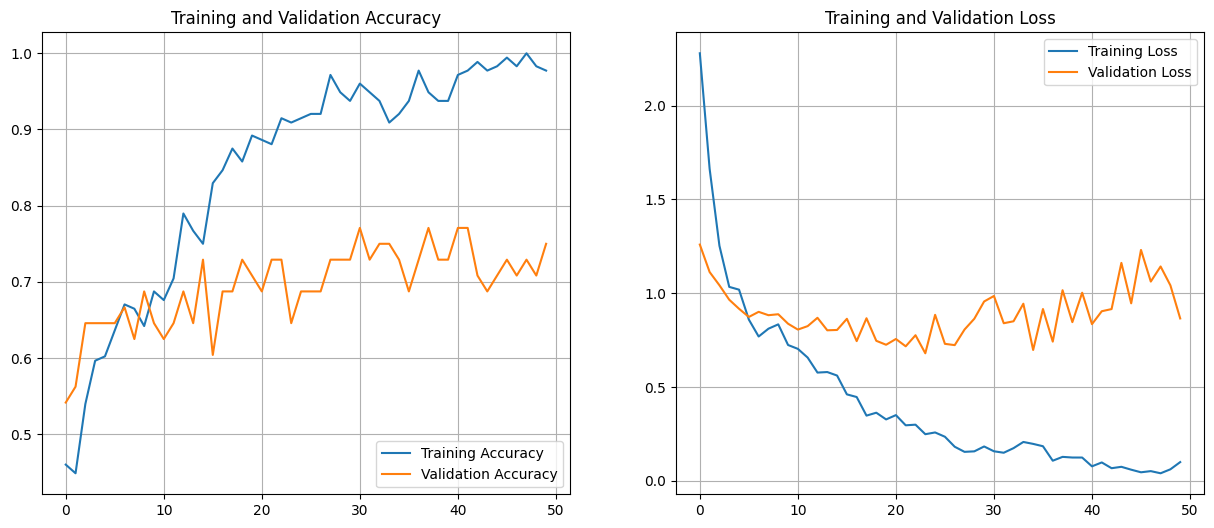

In [25]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(15, 6))

    # Plot 1: Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.grid(True)

    # Plot 2: Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.grid(True)

    plt.show()

# Run the function
plot_training_history(history)

Generating predictions...
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 263ms/step


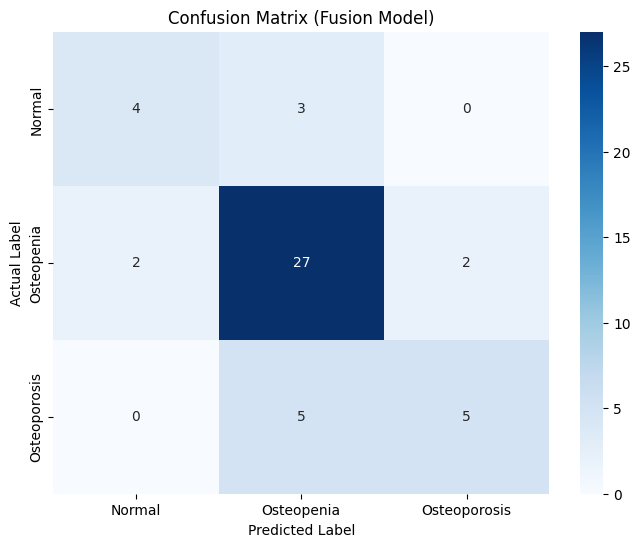


--- Classification Report ---
              precision    recall  f1-score   support

      Normal       0.67      0.57      0.62         7
  Osteopenia       0.77      0.87      0.82        31
Osteoporosis       0.71      0.50      0.59        10

    accuracy                           0.75        48
   macro avg       0.72      0.65      0.67        48
weighted avg       0.74      0.75      0.74        48



In [26]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# --- Step A: Create Evaluation Generator (No Shuffle) ---
# We use the same val_df but turn off shuffling to match predictions to labels
eval_gen = FusionGenerator(
    val_df, 
    feature_cols, 
    batch_size=16, 
    shuffle=False  # IMPORTANT: Must be False
)

# --- Step B: Generate Predictions ---
print("Generating predictions...")
predictions = fusion_model.predict(eval_gen)
y_pred = np.argmax(predictions, axis=1)

# --- Step C: Get True Labels ---
# Note: The generator might drop the last few samples if len(df) is not 
# divisible by batch_size. We must match y_true to exactly what the model predicted.
limit = len(eval_gen) * 16 # batch_size
y_true = val_df['label_encoded'].iloc[:limit].values

# --- Step D: Plot Confusion Matrix ---
class_names = ['Normal', 'Osteopenia', 'Osteoporosis']
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, 
            yticklabels=class_names)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix (Fusion Model)')
plt.show()

# --- Step E: Print Classification Report ---
print("\n--- Classification Report ---")
print(classification_report(y_true, y_pred, target_names=class_names))